## States and territories of Australia

The Australian Bureau of Statistics maintains the Australian Statistical Geography Standard (ASGS). The latest release is [Edition 3](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3).

In order to create a shapefile for Australian states and territories, this notebook relies on the "States and Territories - 2021 - Shapefile" downloaded from [here](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files).

In [6]:
import geopandas as gp
import matplotlib.pyplot as plt

In [2]:
gdf = gp.read_file('https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/STE_2021_AUST_SHP_GDA2020.zip')

In [3]:
gdf

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,6,Tasmania,0,No change,AUS,Australia,6.801754e+04,http://linked.data.gov.au/dataset/asgsed3/STE/6,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,7,Northern Territory,0,No change,AUS,Australia,1.348134e+06,http://linked.data.gov.au/dataset/asgsed3/STE/7,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,8,Australian Capital Territory,0,No change,AUS,Australia,2.358133e+03,http://linked.data.gov.au/dataset/asgsed3/STE/8,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."
8,9,Other Territories,0,No change,AUS,Australia,2.557420e+02,http://linked.data.gov.au/dataset/asgsed3/STE/9,"MULTIPOLYGON (((167.94747 -29.12757, 167.94748..."
9,Z,Outside Australia,1,New,ZZZ,Outside Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/STE/Z,None


In [4]:
gdf = gdf.drop([8, 9])
gdf = gdf.drop(columns=['STE_CODE21', 'CHG_FLAG21', 'CHG_LBL21', 'AUS_CODE21', 'AUS_NAME21'])
gdf

,STE_NAME21,AREASQKM21,LOCI_URI21,geometry
0,New South Wales,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,Victoria,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,Queensland,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,South Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,Western Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,Tasmania,6.801754e+04,http://linked.data.gov.au/dataset/asgsed3/STE/6,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,Northern Territory,1.348134e+06,http://linked.data.gov.au/dataset/asgsed3/STE/7,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,Australian Capital Territory,2.358133e+03,http://linked.data.gov.au/dataset/asgsed3/STE/8,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."


Note: For relatively coarse spatial resolution datasets it can also be necessary to drop row 7 (ACT) because the there are no grid cells whose centre falls within the ACT (which can cause an error with some spatial aggregation routines.

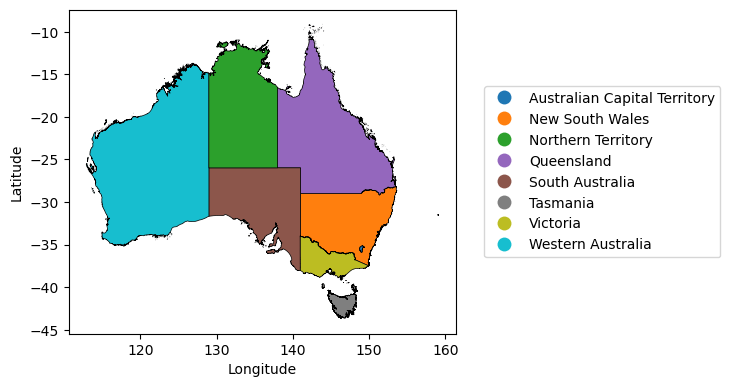

In [8]:
gdf.plot(
    figsize=[5, 5],
    column='STE_NAME21',
    cmap='tab10',
    legend=True,
    linewidth=0.5,
    edgecolor='black',
    legend_kwds={'loc': 'right', 'bbox_to_anchor': (1.7, 0.5)},
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
gdf.to_file('shapefiles_states_territories/aus_states_territories.shp')